In [9]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


In [10]:
df = pd.read_csv("C:\\Users\\gpcbr\\Desktop\\Projeto_Python_Jobs\\State_of_data_2022.csv")
df.columns = [col[1:-1].split(",")[1].replace("'", "").strip() for col in df.columns]
df.head()

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,...,Coletando e limpando os dados que uso para análise e modelagem.,Entrando em contato com os times de negócio para definição do problema,Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,Colocando modelos em produção,Cuidando da manutenção de modelos de Machine Learning já em produção,Realizando construções de dashboards em ferramentas de BI como PowerBI,Utilizando ferramentas avançadas de estatística como SAS,Criando e dando manutenção em ETLs,Criando e gerenciando soluções de Feature Store e cultura de MLOps.,Criando e mantendo a infra que meus modelos e soluções rodam (clusters
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


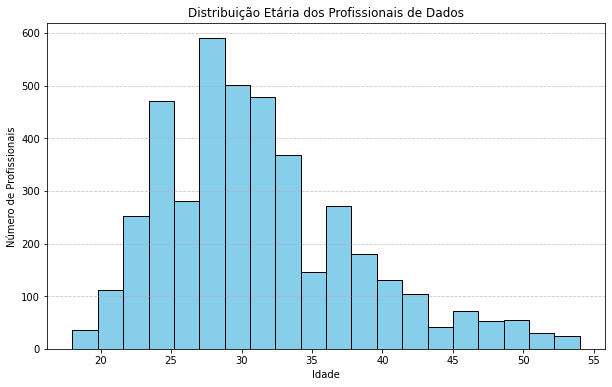

In [12]:
#Análise Demográfica - Pergunta: Qual é a distribuição etária dos profissionais de dados?

plt.figure(figsize=(10, 6))
plt.hist(df['Idade'], bins=20, edgecolor='k', color='skyblue')
plt.title('Distribuição Etária dos Profissionais de Dados')
plt.xlabel('Idade')
plt.ylabel('Número de Profissionais')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()






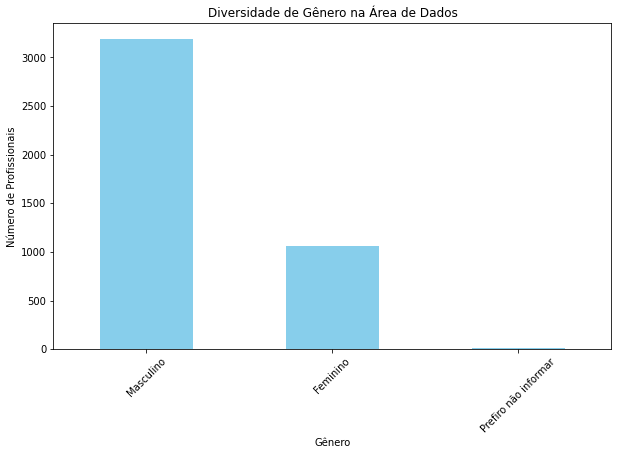

In [13]:
#Análise Demográfica - Pergunta: Como está a diversidade de gênero na área de dados?

contagem_genero = df['Genero'].value_counts()

plt.figure(figsize=(10, 6))
contagem_genero.plot(kind='bar', color='skyblue')
plt.title('Diversidade de Gênero na Área de Dados')
plt.xlabel('Gênero')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45)

plt.show()


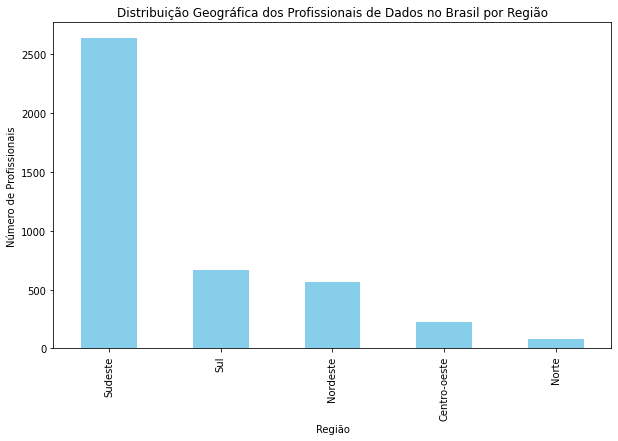

In [14]:
#Análise Demográfica - Pergunta: Qual é a distribuição geográfica desses profissionais no Brasil?

contagem_regiao = df['Regiao onde mora'].value_counts()

plt.figure(figsize=(10, 6))
contagem_regiao.plot(kind='bar', color='skyblue')
plt.title('Distribuição Geográfica dos Profissionais de Dados no Brasil por Região')
plt.xlabel('Região')
plt.ylabel('Número de Profissionais')

plt.show()


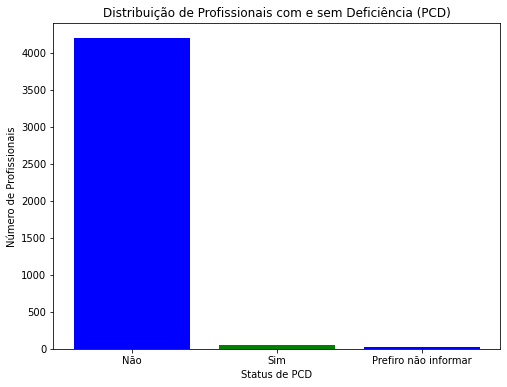

In [15]:
#Análise Demográfica - Pergunta: Quantos deles têm alguma forma de deficiência (PCD)?

contagem_pcd = df['PCD'].value_counts()


plt.figure(figsize=(8, 6))
plt.bar(contagem_pcd.index, contagem_pcd.values, color=['blue', 'green'])
plt.xlabel('Status de PCD')
plt.ylabel('Número de Profissionais')
plt.title('Distribuição de Profissionais com e sem Deficiência (PCD)')
plt.xticks(rotation=0)  # Para manter os rótulos "Sim" e "Não" na horizontal
plt.show()


In [8]:
# Carreira e Experiência Profissional- Pergunta: Qual é o nível de experiência profissional médio na área de dados?

categorias = ['Júnior', 'Pleno', 'Sênior', 'Gestor']

plt.bar(categorias, media_experiencia, color='skyblue', edgecolor='black')
plt.xlabel('Nível de Experiência')
plt.ylabel('Média de Experiência (em anos)')
plt.title('Média de Experiência Profissional na Área de Dados')
plt.ylim(0, 12)  # Defina o limite do eixo y para melhor visualização

# Exiba o gráfico
plt.tight_layout()
plt.show()





NameError: name 'media_experiencia' is not defined

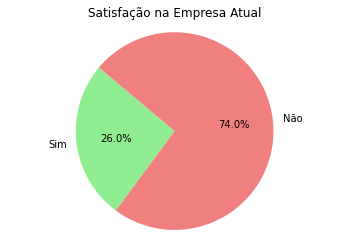

In [16]:
# Carreira e Experiência Profissional- Pergunta: Qual é a satisfação geral no ambiente de trabalho?

satisfacao_empresa = df['Você está satisfeito na sua empresa atual?']

contagem_respostas = satisfacao_empresa.value_counts().sort_index()

rotulos = ['Sim', 'Não']
valores = contagem_respostas.values

cores = ['lightgreen', 'lightcoral']

plt.pie(valores, labels=rotulos, colors=cores, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Satisfação na Empresa Atual')

plt.show()
